In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import autoreload
import matplotlib.pyplot as plt
import missingno as msno
import csv
import os
import sys

from collections import defaultdict, Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

sb.set_style("darkgrid")

%matplotlib inline
%reload_ext autoreload
%autoreload 2

#### Load Data From Source

In [2]:
df = pd.read_csv(r"D:\Open Classroom\Data Files\Video Game Sales\vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### Data Cleaning

#### Checking for Missing Values

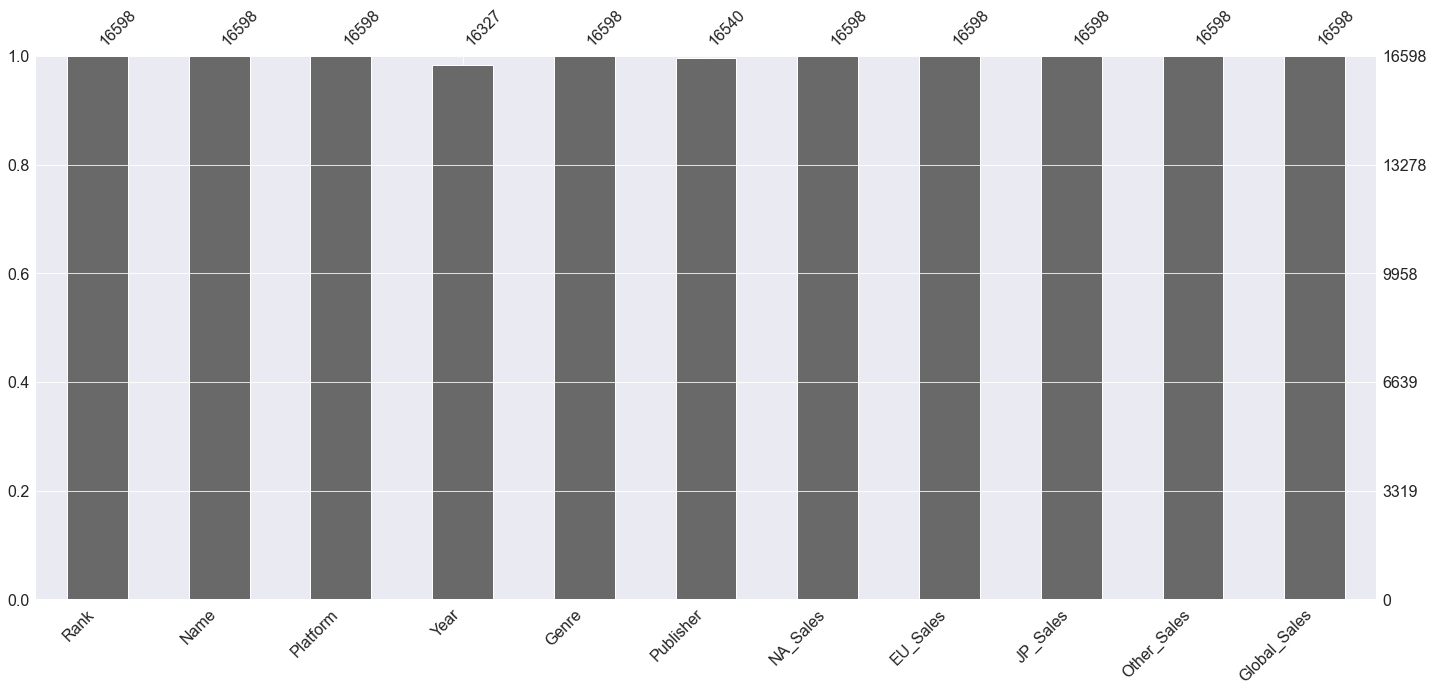

In [3]:
msno.bar(df)

#### Droping NA Values from the Dataframe

In [4]:
df.dropna(axis = "index", how = "any", inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Correlation of Data Columns using Pearman's Rank 

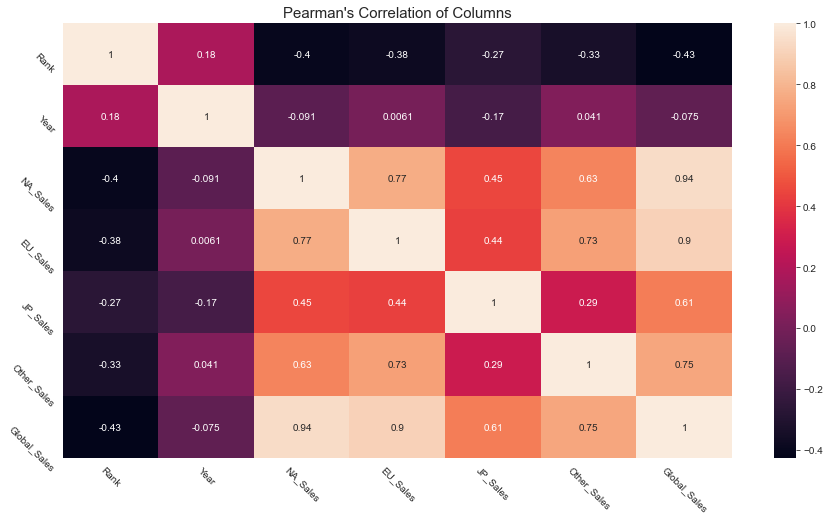

In [5]:
plt.figure(figsize = (15, 8))
df_corr = sb.heatmap(df.corr(), annot = True)
plt.title("Pearman's Correlation of Columns", fontsize = (15))
plt.xticks(rotation = -45)
plt.yticks(rotation = -45)
df_corr

In [6]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


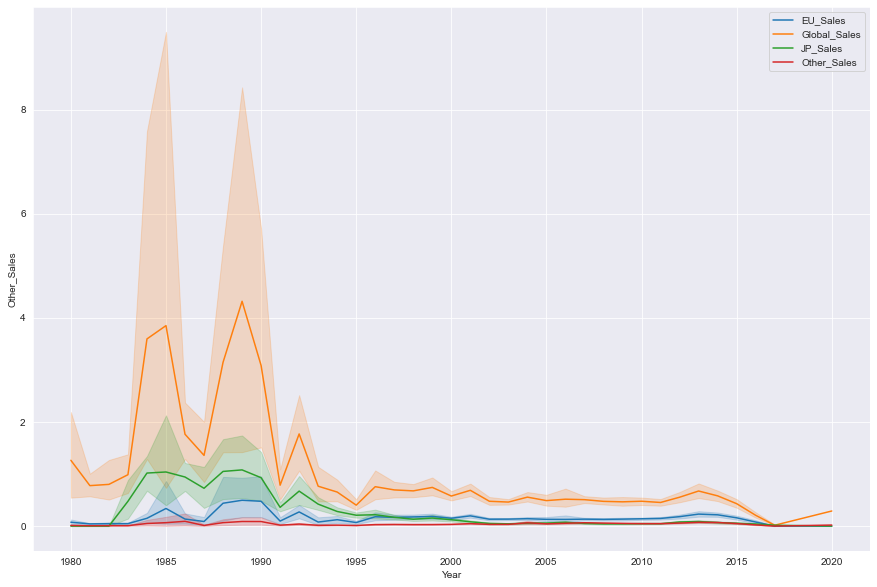

In [7]:
plt.figure(figsize = (15, 10))
sb.lineplot(x = df["Year"], y = df["EU_Sales"], label = "EU_Sales")
sb.lineplot(x = df["Year"], y = df["Global_Sales"], label = "Global_Sales")
sb.lineplot(x = df["Year"], y = df["JP_Sales"], label = "JP_Sales")
sb.lineplot(x = df["Year"], y = df["Other_Sales"], label = "Other_Sales")
plt.legend(loc = "best")

In [8]:
df.shape

(16291, 11)

In [9]:
df["Publisher"].unique().any()

'Nintendo'

In [10]:
df["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [11]:
df["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [12]:
genre_count = 0
for i in df["Genre"].unique():
    genre_count += 1
print(genre_count)

12


#### Create Variables for input and Prediction of the Model

In [13]:
genre = np.where(df["Genre"].unique())
genre

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64),)

In [14]:
X = [genre, df["Year"]]
y = df["Global_Sales"]
X

[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64),),
 0        2006.0
 1        1985.0
 2        2008.0
 3        2009.0
 4        1996.0
           ...  
 16593    2002.0
 16594    2003.0
 16595    2008.0
 16596    2010.0
 16597    2003.0
 Name: Year, Length: 16291, dtype: float64]

#### Create Instance of a Model for predictive algorithm

In [17]:
model = DecisionTreeClassifier() # Instance of a model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model.fit(X_train, y_train)
model_predict = model_fit.predict(X_test)
model_predict

ValueError: Found input variables with inconsistent numbers of samples: [2, 16291]